# NYC's COVID-19 cases and deaths

**Data source:** New York City Health Department

## 0. Import dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read data

In [2]:
update_str = 'as of March 28, 2020, 4:00 pm'
source_str = 'Sources: Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

base_dir = '../data/nyc-health-daily-updates/'

cases_file = base_dir + 'cases/nyc-covid-19-summary-from-2020-03-23.csv'
cases_df = pd.read_csv(cases_file)

deaths_file = base_dir + 'deaths/nyc-covid-19-deaths_2020-03-28_16-00.csv'
deaths_df = pd.read_csv(deaths_file)
deaths_df.set_index('index', inplace=True)

In [4]:
cases_df.tail(1)

,date,time,total_cases,age_median,age_min,age_max,age_0_to_17,age_18_to_44,age_45_to_64,age_65_to_74,...,sex_female,sex_male,sex_unknown,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,borough_unknown,deaths
7,2020-03-28,16:00,30765,48,0,105,591,13213,10596,3571,...,13592,17133,40,5752,8129,5237,9831,1781,35,672


In [6]:
deaths_df

,uc_yes,uc_no,uc_pending,total
index,,,,
age_0_to_17,0,0,0,0
age_18_to_44,23,1,8,32
age_45_to_64,125,8,28,161
age_65_to_74,125,2,31,158
age_75_and_over,254,6,61,321
sex_female,213,6,42,261
sex_male,314,11,86,411
borough_bronx,142,1,9,152
borough_brooklyn,112,5,50,167


## 2. Cases and deaths by age group

In [21]:
deaths_values / deaths_total

array([0.        , 0.04761905, 0.23958333, 0.23511905, 0.47767857])

In [23]:
cases_values / cases_total

array([0.01925395, 0.43046099, 0.3452028 , 0.11633817, 0.0887441 ])

In [29]:
age_cols = ['age_0_to_17', 'age_18_to_44', 'age_45_to_64', 'age_65_to_74', 'age_75_and_over']
age_rows = age_cols
age_labels = ['Age 0 to 17', '18 to 44', '45 to 64', '65 to 74', '75 and over']

cases_count = cases_df.iloc[-1][age_cols].values.astype(int)
cases_total = sum(cases_count)
cases_pct = [int(round(x, 0)) for x in 100 * cases_count / cases_total]

deaths_count = deaths_df.loc[age_rows]['total'].values
deaths_total = sum(deaths_values)
deaths_pct = [int(round(x, 0)) for x in 100 * deaths_count / deaths_total]

cases_deaths_df = pd.DataFrame(
    {'cases_count': cases_count, 'cases_pct': cases_pct, 'deaths_count': deaths_count, 'deaths_pct': deaths_pct},
    index = age_labels
)

cases_deaths_df

,cases_count,cases_pct,deaths_count,deaths_pct
Age 0 to 17,591,2,0,0
18 to 44,13213,43,32,5
45 to 64,10596,35,161,24
65 to 74,3571,12,158,24
75 and over,2724,9,321,48


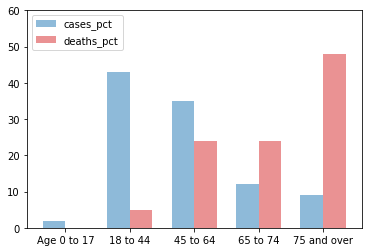

In [53]:
cols = ['cases_pct', 'deaths_pct']

cases_deaths_df[cols].plot.bar(alpha=0.5, color=['C0', 'C3'], rot=0, width=0.7)

plt.ylim(0, 60)
plt.legend(loc='upper left')
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-deaths-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)